In [2]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

# Exercise 1

## 1. 
Draw one realization of $n = 100$ independent random variables $X_1, \dots, X_n$ from a standard Gaussian distribution $\mathcal{N}(0, 1)$.

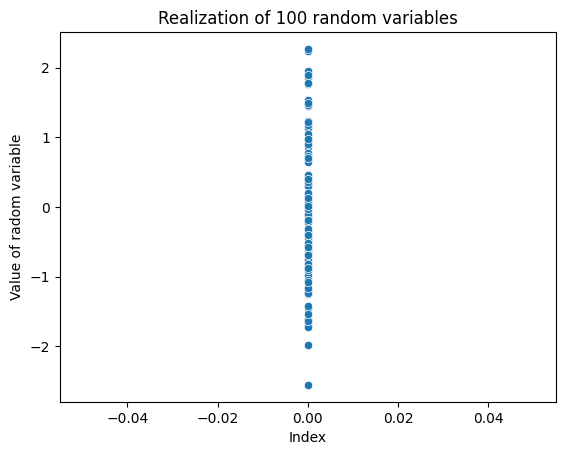

In [3]:
np.random.seed(0)
data_100 = np.random.normal(0, 1, 100)
sns.scatterplot(x=[0]*(len(data_100)), y=data_100)
plt.xlabel("Index")
plt.ylabel("Value of radom variable")
plt.title("Realization of 100 random variables")
plt.show()

To have better insight into the distribution of the random variables, we can plot a histogram of the realization.

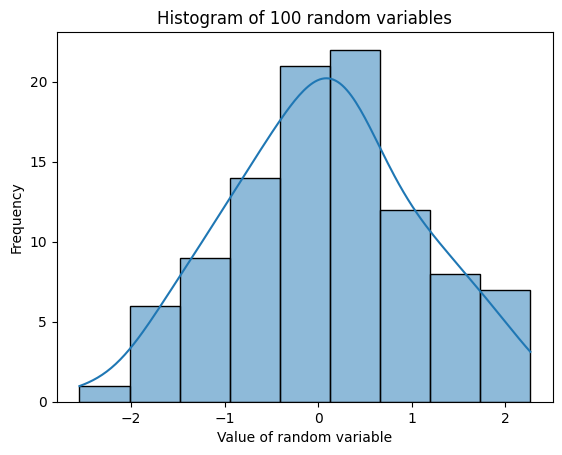

In [4]:
sns.histplot(data_100, kde=True)
plt.xlabel("Value of random variable")
plt.ylabel("Frequency")
plt.title("Histogram of 100 random variables")
plt.show()

### A
For a kernel $K=1\kern-0.25em\text{l}_{[−1;1]}/2$, compute and display the graph of the resulting KDE obtained with different bandwidth values $h \in \mathcal{H}=\{10^{-5},10^{-3},10^{-1},10\}$. What do you see?

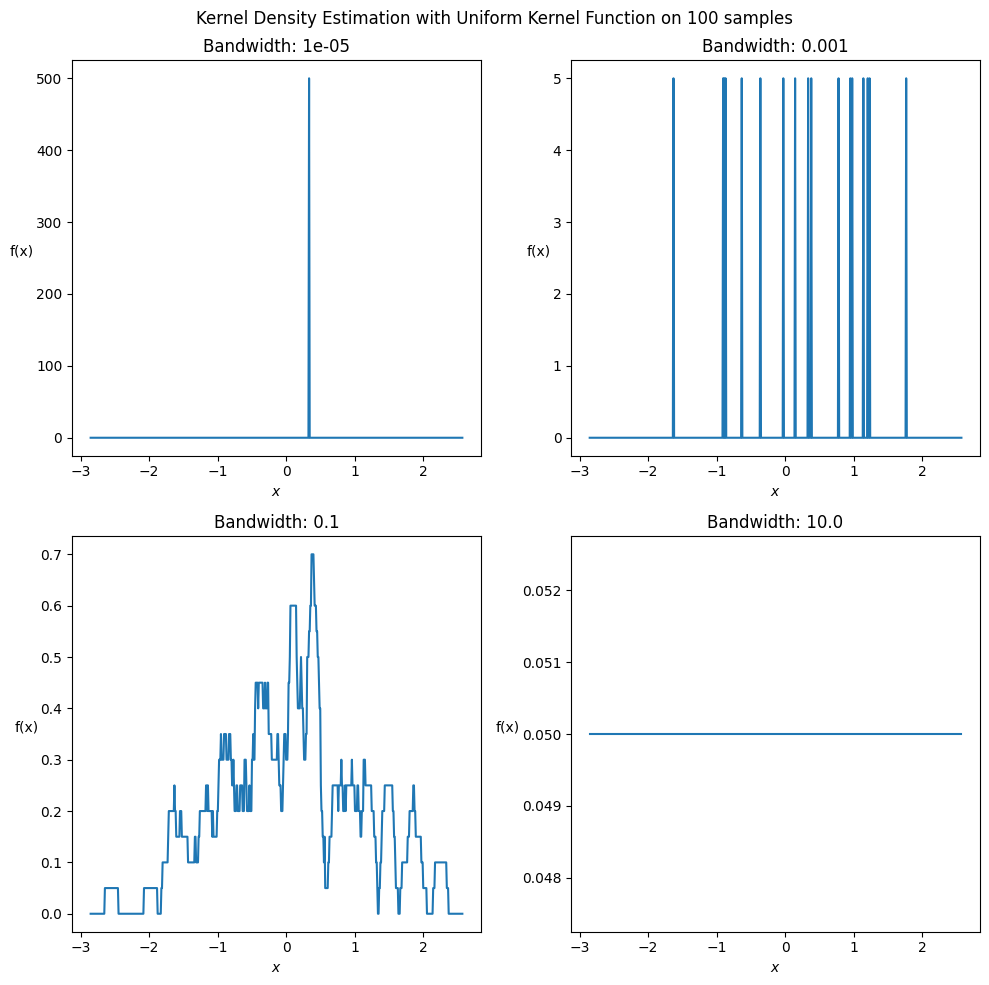

In [5]:
from typing import Callable
import numpy as np
from matplotlib import pyplot as plt


def uniform_kernel_function(x):
    """$K(x)=1_{[-1,1]}/2$"""
    return 0.5 * (np.abs(x) <= 1)


def draw_kde(
    data: np.ndarray,
    h: float,
    ax: plt.Axes,
    kernel_func: Callable[[np.ndarray], np.ndarray],
    num_points: int = 600,
    title: str = None,
):
    """
    :param data: should be a 1D numpy array of data points
    :param h: bandwidth parameter
    :param ax: matplotlib axis object
    :param kernel_func: kernel function, is a function that takes a 1D numpy array and returns a 1D numpy array as PDF values
    """
    x_range = np.linspace(data.min() - 0.3, data.max() + 0.3, num=num_points)

    n_samples = data.size

    # total_sum = 0
    # for i, xi in enumerate(data):
    #     total_sum += np.abs(kernel_func((x_range - xi) / h))
    # y_range = total_sum/(h*n_samples)

    data_ = data.copy()[:, None]
    y_range = kernel_func((x_range[None, :] - data_) / h).sum(axis=0) / (h * n_samples)
    assert (
        y_range.shape == x_range.shape
    ), f"y_range shape: {y_range.shape}, x_range shape: {x_range.shape}"

    ax.plot(x_range, y_range, label=f"bandwith: {h}")

    ax.set_xlabel("$x$")
    ax.set_ylabel("f(x)", rotation=0, labelpad=10)
    if title:
        ax.set_title(title)
    return y_range
    # ax.legend(fontsize=14, shadow=True, title='bandwith value', title_fontsize=16)


H = [1e-5, 1e-3, 1e-1, 1e1]
np.random.seed(0)
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
fig.suptitle("Kernel Density Estimation with Uniform Kernel Function on 100 samples")

for ax, h in zip(ax.flatten(), H):
    draw_kde(data_100, h, ax, uniform_kernel_function, title=f"Bandwidth: {h}")


plt.tight_layout()
plt.show()

### B
Repeat the same experiment with n = 10 000. Is there a change? Comment.


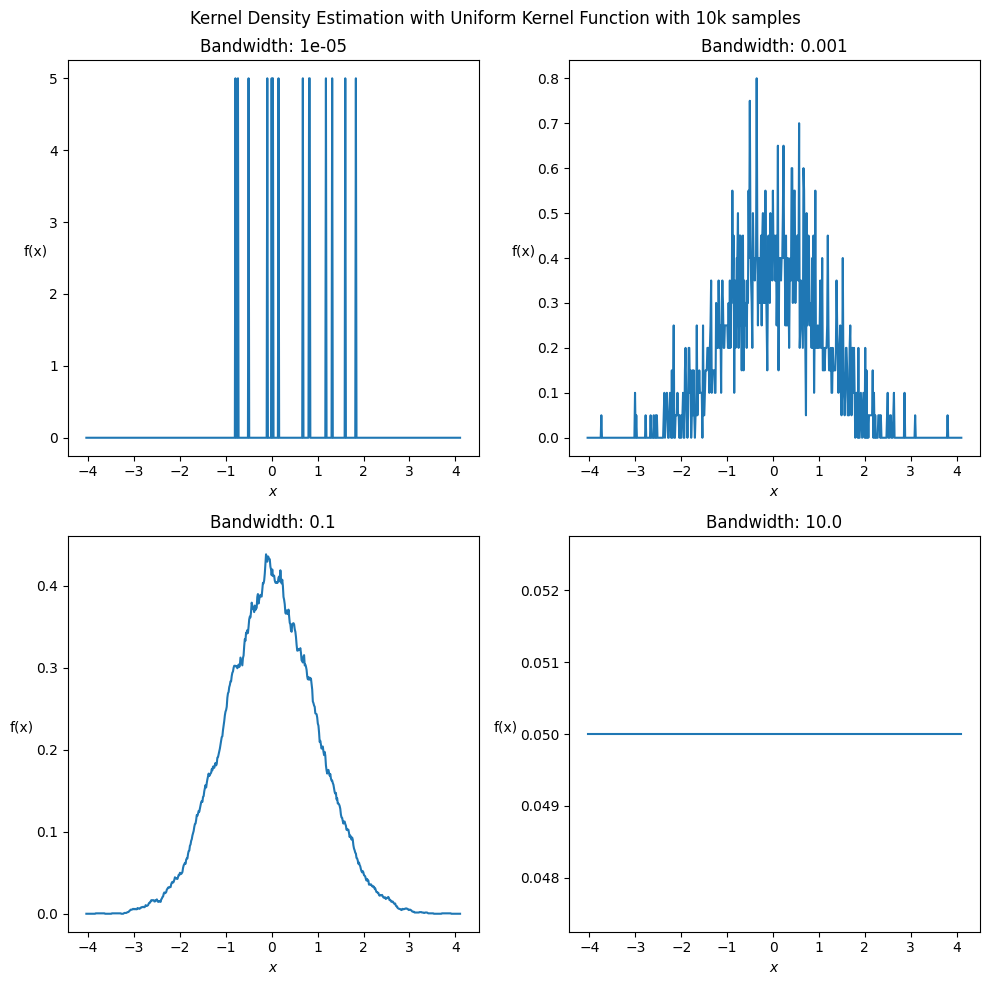

In [8]:
np.random.seed(0)
data_10k = np.random.normal(0, 1, 10000)


fig, ax = plt.subplots(2, 2, figsize=(10, 10))
fig.suptitle("Kernel Density Estimation with Uniform Kernel Function with 10k samples")

for ax, h in zip(ax.flatten(), H):
    draw_kde(data_10k, h, ax, uniform_kernel_function, title=f"Bandwidth: {h}")


plt.tight_layout()
plt.show()

### C
Let us now consider a Gaussian kernel $K^\prime(x) = 1/\sqrt{2\pi}\exp{−x^2/2},\quad x \in R$. Reproduce the same experiments as in the above two questions and make a "by eye" comparison regarding the quality of the approximation you get.

In [9]:
def gaussian_kernel_function(x):
    r"""$K(x)=\frac{1}{\sqrt{2\pi}}e^{-x^2/2}$"""
    return 1 / np.sqrt(2 * np.pi) * np.exp(-x ** 2 / 2)

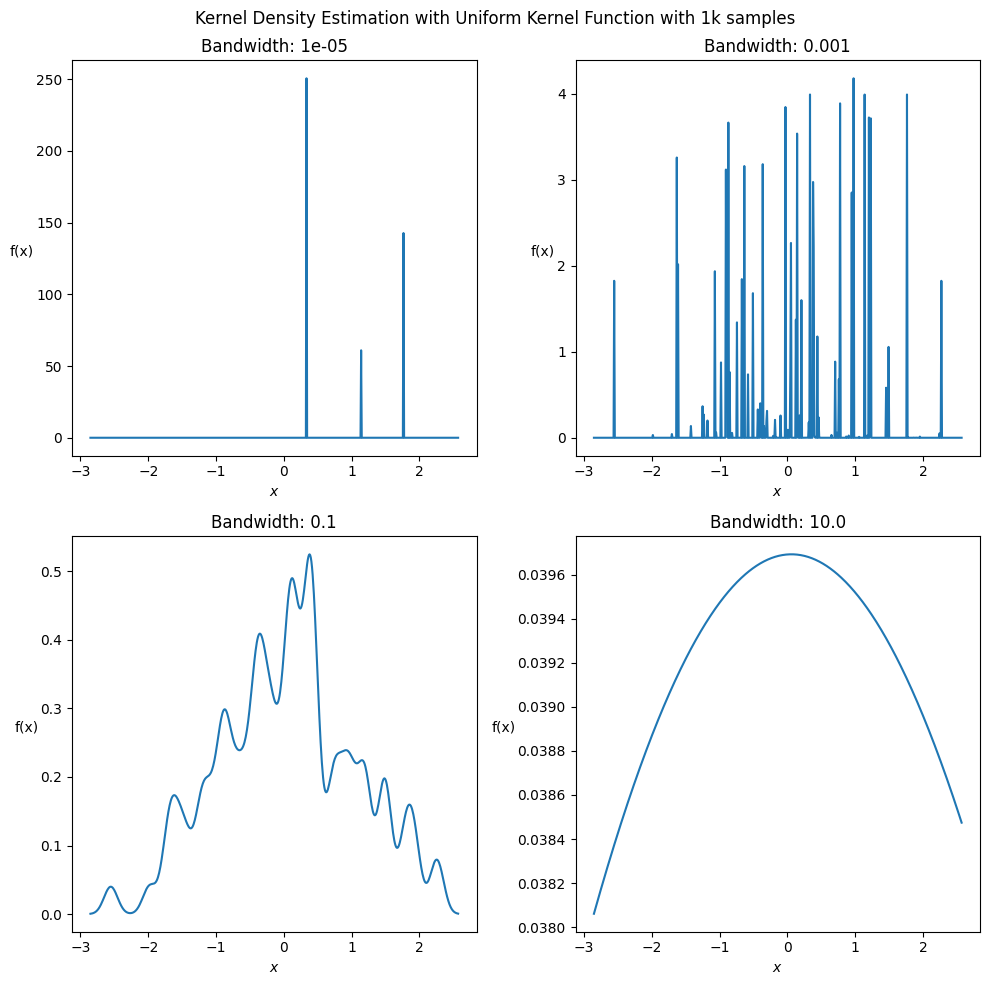

In [10]:

fig, ax = plt.subplots(2, 2, figsize=(10, 10))
fig.suptitle("Kernel Density Estimation with Uniform Kernel Function with 1k samples")

for ax, h in zip(ax.flatten(), H):
    draw_kde(data_100, h, ax, gaussian_kernel_function, title=f"Bandwidth: {h}")


plt.tight_layout()
plt.show()

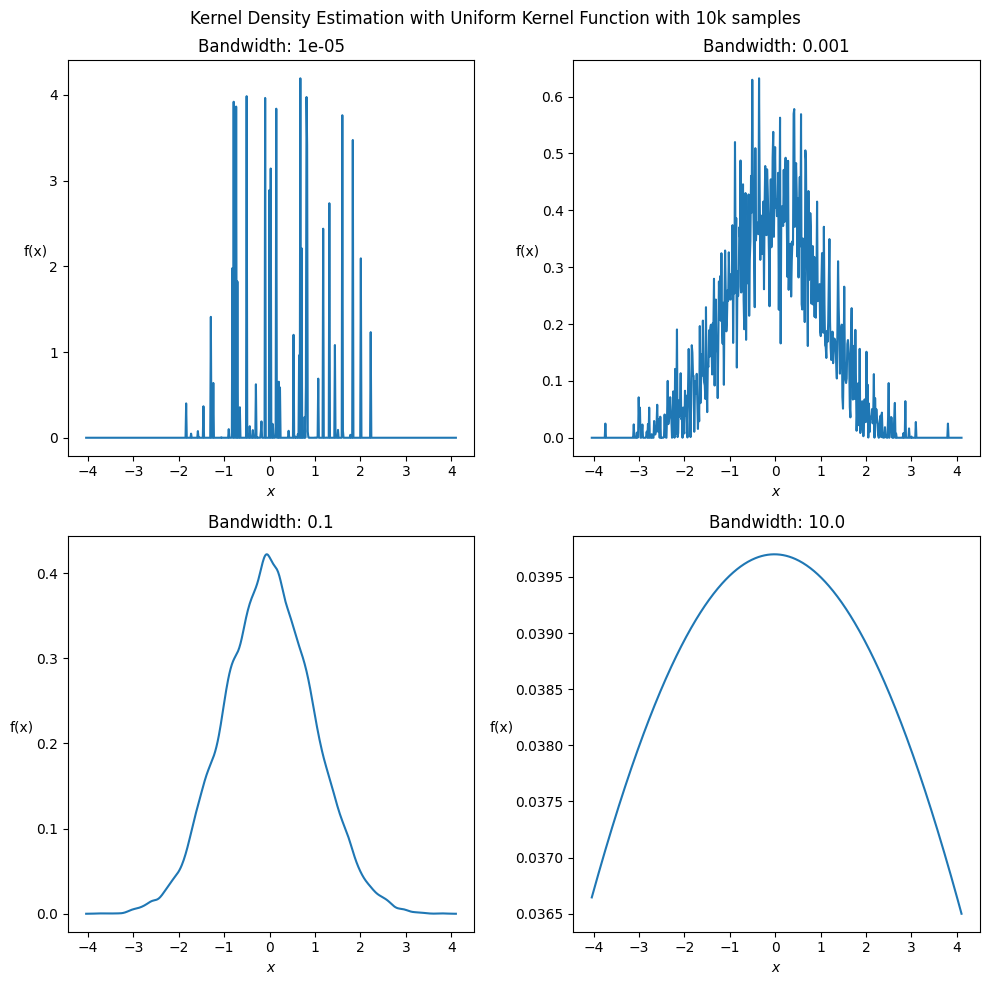

In [11]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
fig.suptitle("Kernel Density Estimation with Uniform Kernel Function with 10k samples")


for ax, h in zip(ax.flatten(), H):
    draw_kde(data_10k, h, ax, gaussian_kernel_function, title=f"Bandwidth: {h}")


plt.tight_layout()
plt.show()

To make better comparison, lets plot the KDEs side by side.

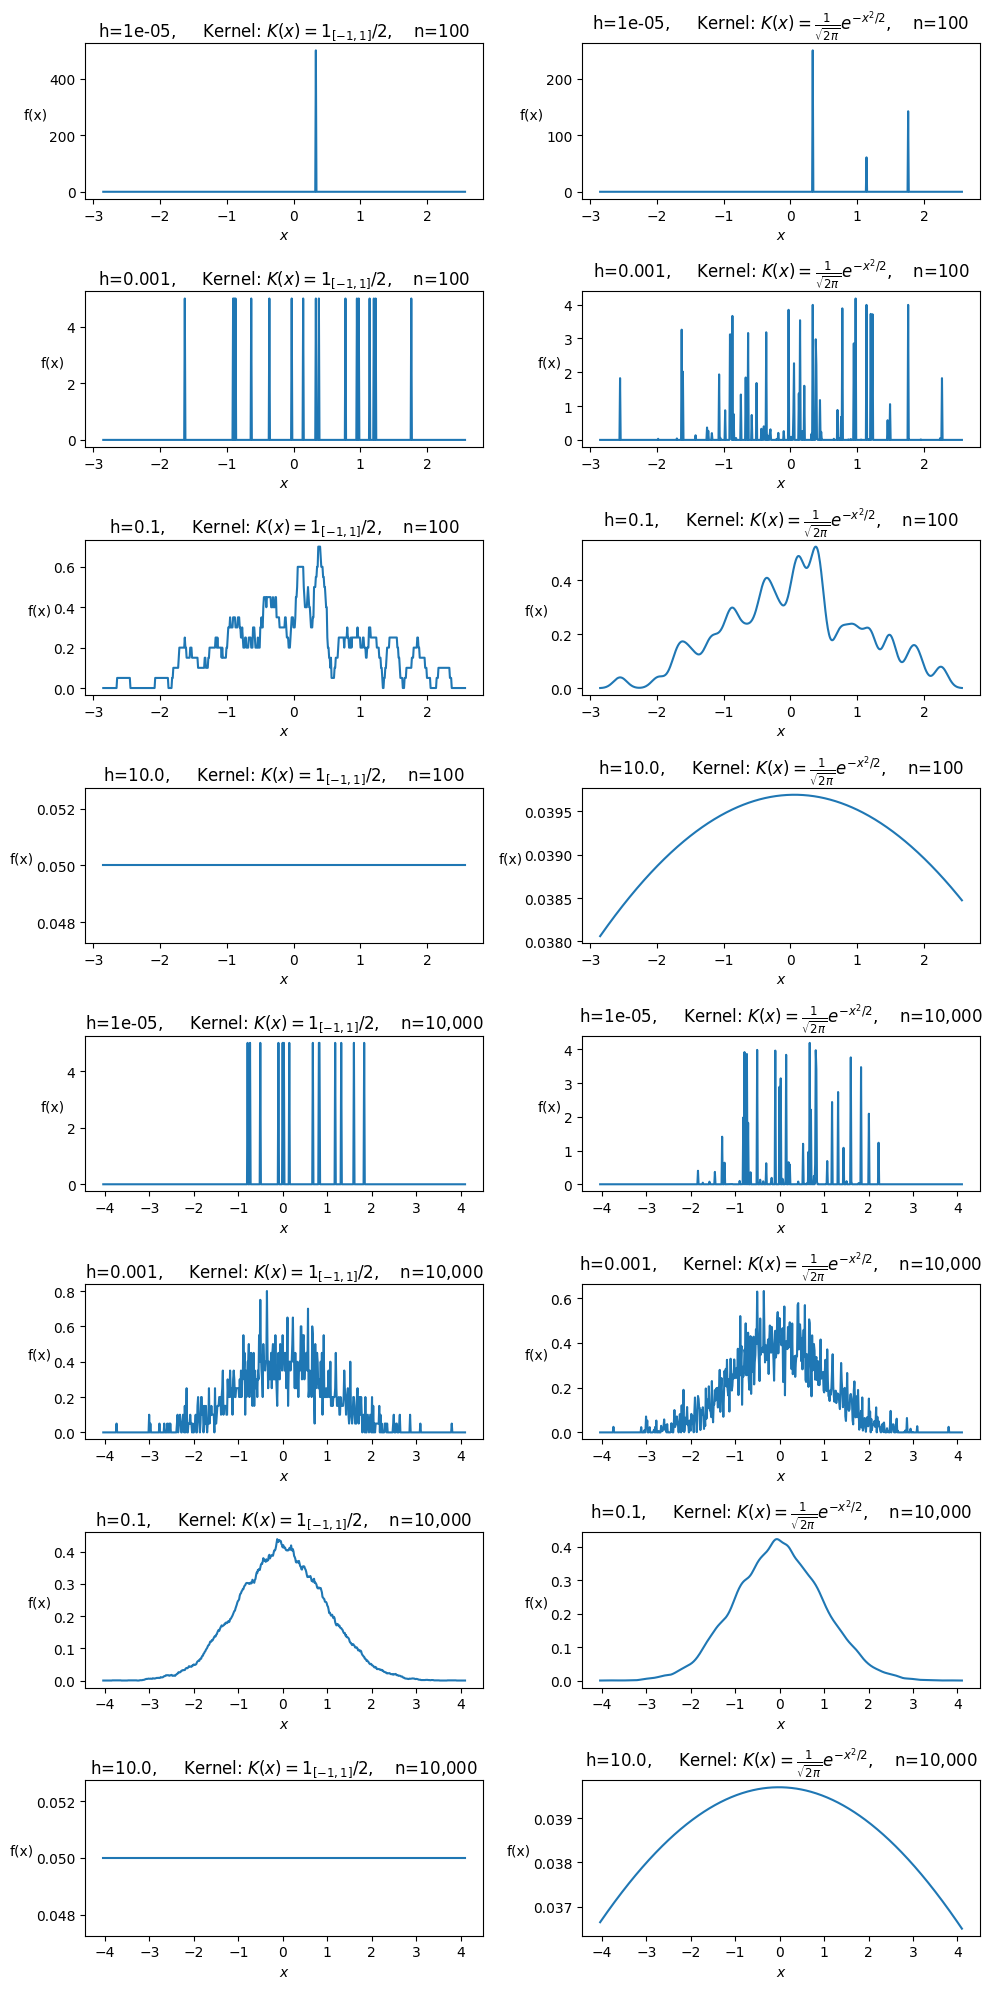

In [14]:
from itertools import product

fig, axes = plt.subplots(8, 2, figsize=(10, 20))

axes = axes.flatten()
for ax, (data, h, kernel_func) in zip(axes, product([data_100, data_10k], H, [uniform_kernel_function, gaussian_kernel_function])):
    draw_kde(data, h, ax, kernel_func, title=f"{h=},     Kernel: {kernel_func.__doc__},    n={len(data):,}")

plt.tight_layout()
plt.show()

## 2
Using a Monte-Carlo (MC) strategy, compute (an approximation to) the $MSE_h(x_0)$ criterion
for the KDE built from $K, n = 100$, and varying the bandwidth on the grid $\mathcal{H}$.

## a
Start with $x_0 = −2$ Which value of h is the best?
